In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame()

Variables:
* evenly spaced
* choice of function
* parameters
* x min/max
* noise (0-1)

In [60]:
def get_time_series(even_spaced, func, size, params, x_minimum, x_maximum, noise_level):
    x_vals = np.linspace(x_minimum, x_maximum, num=n, endpoint=True) if even_spaced else np.random.uniform(x_minimum, x_maximum, size=n)
    y_vals = get_data_points(func, params, x_vals)
    y_vals = add_noise(y_vals, noise_level)
    return [x_vals, y_vals]

In [64]:
def get_data_points(f, p, x):
    if f in ['sin', 'cos', 'tan']:
        a, b, c, d = p[0], p[1], p[2], p[3]
        if f == 'sin':
            x = b * (x + c)
            return a * np.sin(x) + d

In [31]:
def add_noise(points, noise_level):
    hard_code_factor = 3
    noise = np.random.normal(0, np.mean(np.abs(points))/hard_code_factor*noise_level, len(points))
    points += noise
    return points

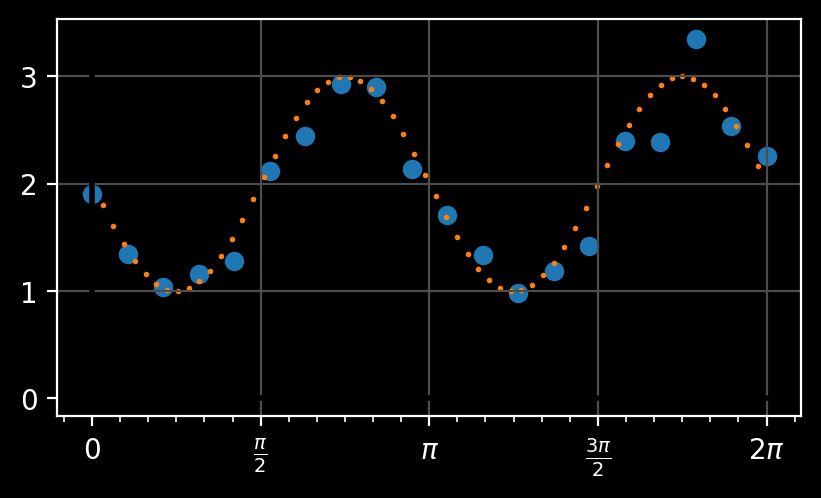

In [9]:
params = [1, 2, np.pi/2, 2]
func = 'sin'
n = 20
x_min = 0
x_max = 2*np.pi
noise = 0.4
data = get_time_series(True, func, n, params, x_min, x_max, noise)
func_x = np.arange(x_min, x_max, 0.1)
plt.scatter(data[0], data[1])
plt.scatter(func_x, params[0]*np.sin((func_x + params[2]) * params[1]) + params[3], s=1)
ax = plt.gca()
ax.grid(True)
ax.set_aspect(1.0)
ax.axhline(x_min, color='black', lw=2)
ax.axvline(x_min, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))